In [10]:
%reset -f
 
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

dataset = pd.read_csv('./dane/serce.csv',',')

noColumn = dataset.shape[1]
print("Liczba kolumn=",noColumn)

noRow = dataset.shape[0]
print("Liczba wierszy=",noRow)

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.5)#, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

myNoNeighbors = 20
myMetric = 'euclidean'

model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric)
model.fit(features_train, np.ravel(labels_train))

labels_predicted = model.predict(features_test)

accuracy = metrics.accuracy_score(labels_test, labels_predicted)

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) =========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Liczba wierszy= 270
Dokładnośc klasyfikacji= 0.5851851851851851
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.55      0.90      0.68        67
           2       0.73      0.28      0.40        68

    accuracy                           0.59       135
   macro avg       0.64      0.59      0.54       135
weighted avg       0.64      0.59      0.54       135

====== MACIERZ POMYŁEK (confusion matrix) =========
[[60  7]
 [49 19]]


noColumn= 14
Wartosci atrybutu decyzyjnego w tablicy testowej:
diagnoza
1    27
2    27
Name: count, dtype: int64
[[17 10]
 [11 16]]


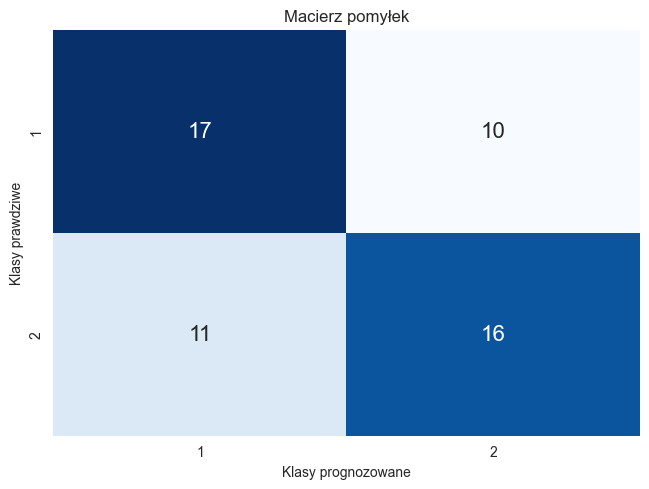

In [1]:
%reset -f

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]
print("noColumn=",noColumn)

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.2, random_state=1234)
features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


decValues = labels_test['diagnoza'].value_counts()
print("Wartosci atrybutu decyzyjnego w tablicy testowej:")
print(decValues)

myNoNeighbors = 5
myMetric = 'euclidean'

model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric)
model.fit(features_train, np.ravel(labels_train))

labels_predicted = model.predict(features_test)


class_names_ordered = sorted(np.unique(labels_train))
my_class_names = []
for i in range(0,len(class_names_ordered)):
    my_class_names.append(str(class_names_ordered[i]))

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)

dataframe = pd.DataFrame(conf_matrix, index=my_class_names, columns=my_class_names)
sns.heatmap(dataframe, annot=True, cbar=None, annot_kws={"size": 16}, cmap="Blues")
plt.title("Macierz pomyłek"), 
plt.tight_layout()
plt.ylabel("Klasy prawdziwe"), 
plt.xlabel("Klasy prognozowane")
plt.show()

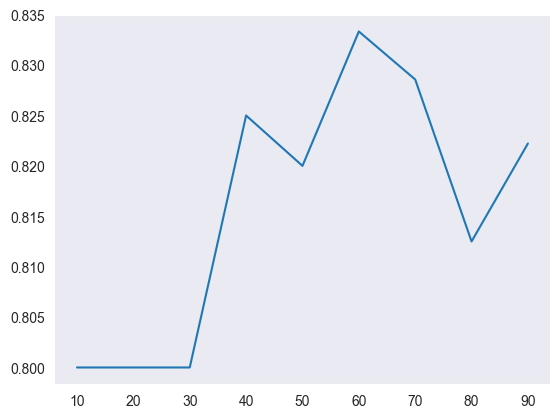

In [4]:
%reset -f

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
%matplotlib inline

def test(testSize):
    dataset = pd.read_csv('./dane/rezygnacje.csv', usecols=['CZAS_POSIADANIA', 'PLAN_MIEDZY', 'POCZTA_G', 'L_WIAD_POCZTA_G', 'L_POL_BIURO', 'REZYGN'])

    features = dataset.iloc[:, :-1]
    labels = dataset.iloc[:,-1]

    datasets = train_test_split(features, labels, test_size=testSize, random_state=1234)
    features_train = datasets[0]
    features_test = datasets[1]
    labels_train = datasets[2]
    labels_test = datasets[3]

    myNoNeighbors = 5
    myMetric = 'euclidean'

    model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric)
    model.fit(features_train, np.ravel(labels_train))

    labels_predicted = model.predict(features_test)

    accuracy = accuracy_score(labels_test, labels_predicted)

    return accuracy

x = np.arange(90, 0, -10)
y = np.array([test(testSize) for testSize in x])

plt.plot(x, y)
plt.grid()
plt.show()

In [12]:
%reset -f

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

model = KNeighborsClassifier(n_neighbors=5,metric='euclidean') 

noFold = 10

scores = cross_val_score(model, features, np.ravel(labels), cv=noFold
                        )
print("Dokładnośc klasyfikacji (accuracy) dla części:",scores)
print("Średnia dokładność:",scores.mean())
print("Odchylenie standardowe:", scores.std())



Dokładnośc klasyfikacji (accuracy) dla części: [0.62962963 0.7037037  0.66666667 0.74074074 0.59259259 0.7037037
 0.62962963 0.51851852 0.77777778 0.66666667]
Średnia dokładność: 0.662962962962963
Odchylenie standardowe: 0.071145824860365


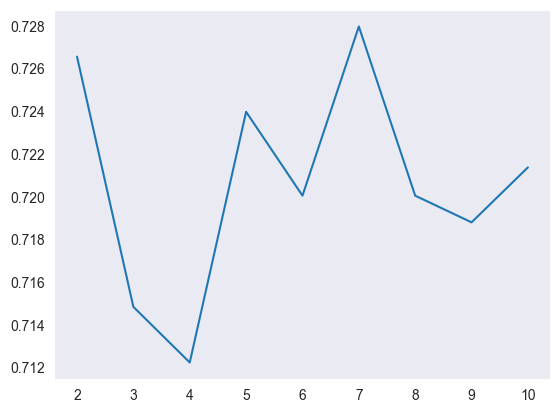

In [6]:
%reset -f

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

%matplotlib inline

dataset = pd.read_csv('./dane/diabetes.csv')

features = dataset.iloc[:, :-1]
labels = dataset.iloc[:,-1]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)
features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

myNoNeighbors = 5 
myMetric = 'euclidean' 

model = KNeighborsClassifier(n_neighbors=myNoNeighbors,metric=myMetric) 
    
def score(cv):
    scores = cross_val_score(model, features, np.ravel(labels), cv=cv)
    return scores.mean()


x = np.arange(2, 11, 1)
y = np.array([score(cv) for cv in x])

plt.plot(x, y)
plt.grid()
plt.show()

Użyte progi prawdopodobieństwa: [2.         1.         0.66666667 0.33333333 0.        ]
AUC= 0.6389751552795031


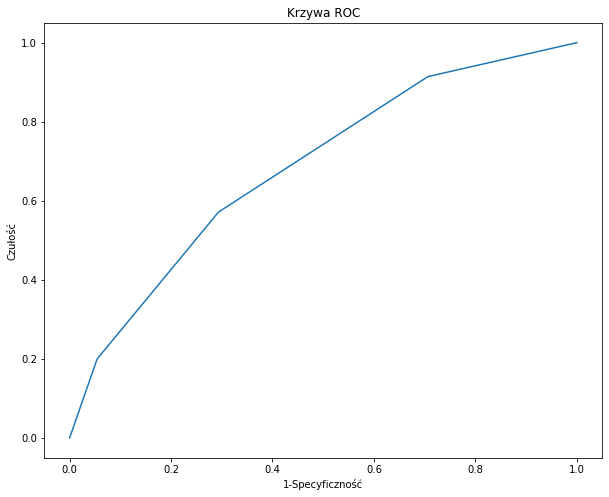

In [4]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

%matplotlib inline

dataset = pd.read_csv('./dane/serce.csv')


noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

classifier = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

classifier.fit(features_train, np.ravel(labels_train))

labels_predicted = classifier.predict(features_test)
auc = metrics.roc_auc_score(labels_test, labels_predicted) 

target_probabilities = classifier.predict_proba(features_test)[:,1]

czulosci, specyficznosci, progi = metrics.roc_curve(labels_test,target_probabilities,pos_label=2)

print("Użyte progi prawdopodobieństwa:",progi)
print("AUC=",auc)


plt.figure(figsize=(10, 8))
plt.plot(czulosci, specyficznosci)
plt.title("Krzywa ROC")
plt.xlabel("1-Specyficzność")
plt.ylabel("Czułość")
plt.show()




# Generowanie decyzji dla nowych obiektów

In [19]:
%reset -f

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

def myformat(number):
    return "{0:.4f}".format(float(number))


datasetTrain = pd.read_csv('./dane/serce_train.csv')
datasetTest = pd.read_csv('./dane/serce_test.csv')

noColumn = datasetTrain.shape[1]

features_train = datasetTrain.iloc[:,:noColumn-1]
labels_train = datasetTrain.iloc[:,[noColumn-1]]

features_test = datasetTest.iloc[:,:noColumn-1]
labels_test_orig = datasetTest.iloc[:,[noColumn-1]]

model = KNeighborsClassifier(n_neighbors=3,metric='euclidean') 
model.fit(features_train, np.ravel(labels_train))


labels_predicted = model.predict(features_test)
vector_labels_test_orig = np.ravel(labels_test_orig)

print("Decyzje wygenerowane:",labels_predicted)
print("Decyzje oryginalne:  ",vector_labels_test_orig)

labels_predicted_proba = model.predict_proba(features_test)

print("Kolejność klas decyzyjnych:",model.classes_)

for i in range(0,len(labels_predicted_proba)):
    p1 = labels_predicted_proba[i][0]
    p2 = labels_predicted_proba[i][1]
    wynik = "sukces"
    if  labels_predicted[i]!=vector_labels_test_orig[i]: wynik = "porażka"
    print("Prawdopodobieństwa:",myformat(p1),myformat(p2),
          "  Oryginalna decyzja:",vector_labels_test_orig[i],"Wygenerowana decyzja:",labels_predicted[i]," - ",wynik)


Decyzje wygenerowane: [2 2 2 2 2 2 1 2 2 1]
Decyzje oryginalne:   [2 1 2 1 1 2 1 1 2 1]
Kolejność klas decyzyjnych: [1 2]
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.6667 0.3333   Oryginalna decyzja: 1 Wygenerowana decyzja: 1  -  sukces
Prawdopodobieństwa: 0.3333 0.6667   Oryginalna decyzja: 1 Wygenerowana decyzja: 2  -  porażka
Prawdopodobieństwa: 0.0000 1.0000   Oryginalna decyzja: 2 Wygenerowana decyzja: 2  -  sukces
Prawdopodobieństwa: 0.6667 0.3333   O

In [9]:
%reset -f

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

dataSet = pd.read_csv('./dane/rezygnacje.csv', usecols=['CZAS_POSIADANIA', 'PLAN_MIEDZY', 'POCZTA_G', 'L_WIAD_POCZTA_G', 'L_POL_BIURO', 'REZYGN'])
dataSetTest = pd.read_csv('./dane/czy_zrezygnuja.csv', usecols=['CZAS_POSIADANIA', 'PLAN_MIEDZY', 'POCZTA_G', 'L_WIAD_POCZTA_G', 'L_POL_BIURO'])
dataSetTestOrg = pd.read_csv('./dane/czy_zrezygnuja.csv')

features_train = dataSet.iloc[:, :-1]
labels_train = dataSet.iloc[:, -1]

model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')
model = model.fit(features_train, np.ravel(labels_train))

predict = model.predict(dataSetTest)

result = dataSetTestOrg.join(pd.DataFrame(predict, columns=['REZYGN']))

result.to_csv("rezygn_dec.csv", index=False)

print("Uzyskane decyzje:", predict)

Uzyskane decyzje: [0 0 0 0 0 0 0 0]


In [20]:
%reset -f
 
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dataset = pd.read_csv('./dane/serce.csv')


noColumn = dataset.shape[1]
print("Liczba kolumn=",noColumn)

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]

my_criterion = "gini"

my_max_depth = 5
my_min_samples_split = 10
my_min_samples_leaf = 10
my_max_leaf_nodes = 30
my_min_impurity_decrease = 0.02

model =  DecisionTreeClassifier(criterion=my_criterion,
                               max_depth=my_max_depth,
                               min_samples_split=my_min_samples_split,                                
                               min_samples_leaf = my_min_samples_leaf,
                               max_leaf_nodes = my_max_leaf_nodes,
                               min_impurity_decrease = my_min_impurity_decrease)

model.fit(features_train, np.ravel(labels_train))

labels_predicted = model.predict(features_test)

accuracy = metrics.accuracy_score(labels_test, labels_predicted)

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )

print("====== MACIERZ POMYŁEK (confusion matrix) +=========")

conf_matrix = confusion_matrix(labels_test, labels_predicted)
print(conf_matrix)


Liczba kolumn= 14
Dokładnośc klasyfikacji= 0.7222222222222222
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.72      0.83      0.77        92
           2       0.72      0.59      0.65        70

    accuracy                           0.72       162
   macro avg       0.72      0.71      0.71       162
weighted avg       0.72      0.72      0.72       162

====== MACIERZ POMYŁEK (confusion matrix) +=========
[[76 16]
 [29 41]]


### Wizualizacja drzewa decyzyjnego

In [1]:
%reset -f

import pandas as pd
import numpy as np
from io import StringIO
import pydotplus
from sklearn import tree
import os
from IPython.display import IFrame

dataset = pd.read_csv('./dane/serce.csv')
noColumn = dataset.shape[1]
maximal_depth = 3

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

features_names = list(features)

class_names_ordered = sorted(np.unique(labels))
my_class_names = []
for i in range(0,len(class_names_ordered)):
    my_class_names.append(str(class_names_ordered[i]))

clf = tree.DecisionTreeClassifier(criterion = "gini",max_depth=maximal_depth, min_samples_leaf=5, class_weight="balanced")
clf.fit(features, labels)


dot_data = StringIO()
tree.export_graphviz(
    decision_tree=clf,
    out_file=dot_data,
    feature_names=features_names,
    class_names=my_class_names,
    filled=True,
    rounded=True,
    impurity=True
)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_pdf('serce1.pdf') #Zapis drzewa na dysk
IFrame("serce1.pdf", width=900, height=800) #Otwarcie drzewa w przeglądarce

In [11]:
%reset -f
 
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report


dataset = pd.read_csv('./dane/serce.csv')


noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


model = GaussianNB()

model.fit(features_train, np.ravel(labels_train))

labels_predicted = model.predict(features_test)

accuracy = metrics.accuracy_score(labels_test, labels_predicted)

print("Dokładnośc klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )



Dokładnośc klasyfikacji= 0.8518518518518519
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.85      0.89      0.87        92
           2       0.85      0.80      0.82        70

    accuracy                           0.85       162
   macro avg       0.85      0.85      0.85       162
weighted avg       0.85      0.85      0.85       162



In [12]:
%reset -f
 
import numpy as np
import pandas as pd
from sklearn import metrics, datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report


dataset = pd.read_csv('./dane/serce.csv')


noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

datasets = train_test_split(features, labels, test_size=0.6, random_state=1234)

features_train = datasets[0]
features_test = datasets[1]
labels_train = datasets[2]
labels_test = datasets[3]


model = MultinomialNB()

model.fit(features_train, np.ravel(labels_train))

labels_predicted = model.predict(features_test)

accuracy = metrics.accuracy_score(labels_test, labels_predicted)

print("Dokładność klasyfikacji=" ,accuracy)

print("========= PEŁNE WYNIKI KLASYFIKACJI ================")

report = classification_report(labels_test, labels_predicted)
print(report )


Dokładność klasyfikacji= 0.7469135802469136
========= PEŁNE WYNIKI KLASYFIKACJI ================
              precision    recall  f1-score   support

           1       0.79      0.76      0.77        92
           2       0.70      0.73      0.71        70

    accuracy                           0.75       162
   macro avg       0.74      0.74      0.74       162
weighted avg       0.75      0.75      0.75       162



In [2]:
%reset -f

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.naive_bayes import BernoulliNB

from sklearn import metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

dataset = pd.read_csv('./dane/serce.csv')

noColumn = dataset.shape[1]

features = dataset.iloc[:,:noColumn-1]
labels = dataset.iloc[:,[noColumn-1]]

data = train_test_split(features, labels, test_size=0.6, random_state=12345)
features_train = data[0]
features_test = data[1]
labels_train = data[2]
labels_test = data[3]

models = []
modelNameList = []

model = KNeighborsClassifier(n_neighbors=3,metric = 'euclidean')
models.append(model)
modelNameList.append("KNN")

model = GaussianNB()
models.append(model)
modelNameList.append("GaussianNB")

model = BernoulliNB()
models.append(model)
modelNameList.append("BernoulliNB")

#Drzewo decyzyjne
model = tree.DecisionTreeClassifier(max_depth=5)
models.append(model)
modelNameList.append("DecisionTree")


results = []
for i in range(0,len(models)):
    model = models[i]
    model.fit(features_train, np.ravel(labels_train))
    labels_predicted = model.predict(features_test)
    accuracy = metrics.accuracy_score(labels_test, labels_predicted)    
    locList = []; locList.append(accuracy); locList.append(modelNameList[i])
    results.append(locList)

def myFunc(result):
    return result[0]

results.sort(reverse=True, key=myFunc)

for i in range(0,len(results)):
    result = results[i]
    print(str(i+1)+".",result[0],result[1])



1. 0.845679012345679 GaussianNB
2. 0.7962962962962963 BernoulliNB
3. 0.7777777777777778 DecisionTree
4. 0.6728395061728395 KNN


Wybrane kolumny:


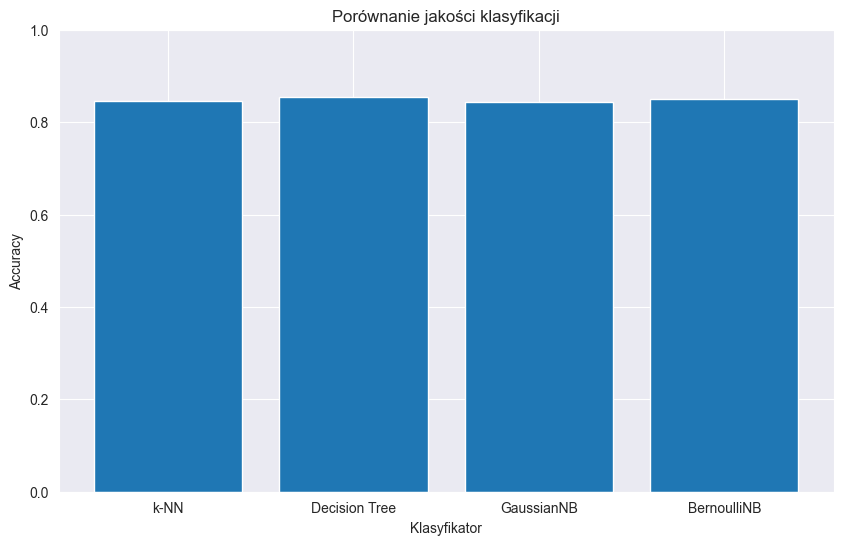

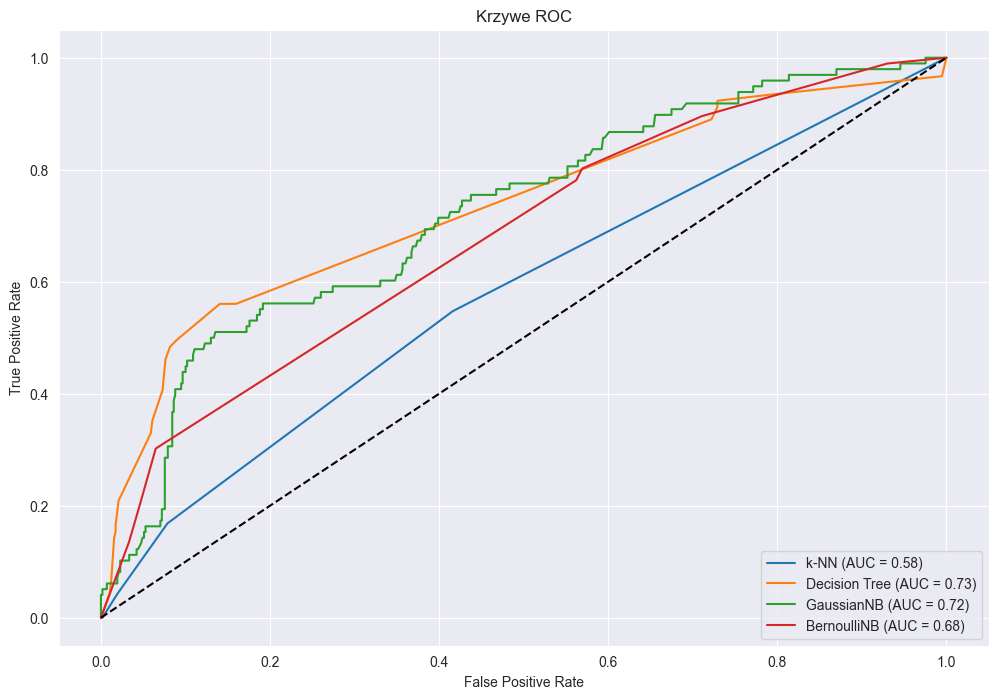

Najlepszy klasyfikator pod względem accuracy: Decision Tree
Najlepszy klasyfikator pod względem AUC: Decision Tree
Wszystkie kolumny:


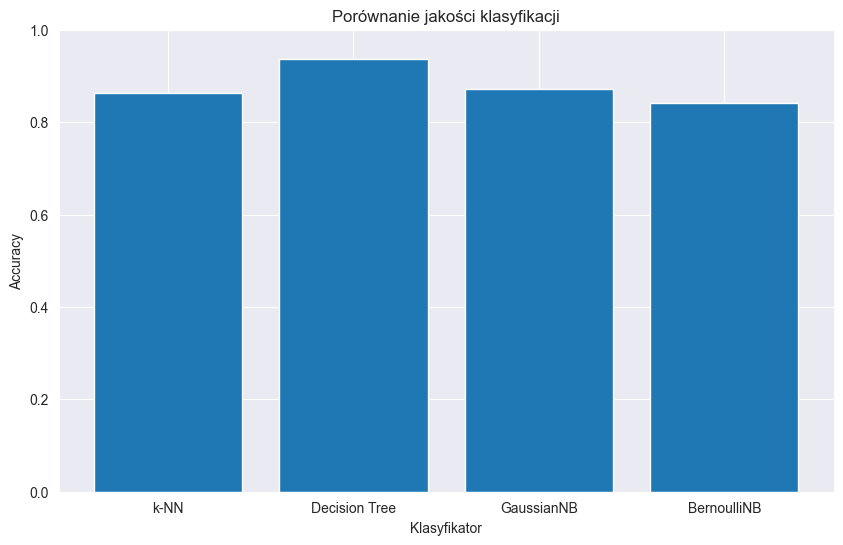

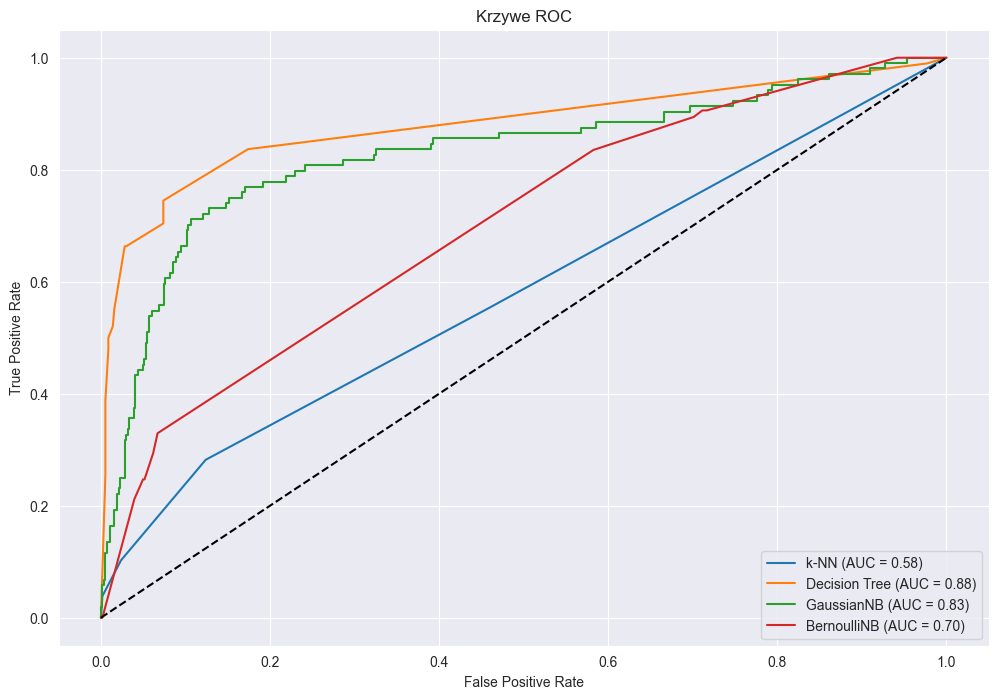

Najlepszy klasyfikator pod względem accuracy: Decision Tree
Najlepszy klasyfikator pod względem AUC: Decision Tree


In [47]:
%reset -f

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def experiment(data_test):
    features_test = data_test.iloc[:, :-1]
    labels_test = data_test.iloc[:, [-1]]

    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    tree = DecisionTreeClassifier(max_depth=5)
    gaussian = GaussianNB()
    bernoulli = BernoulliNB()

    classifiers = {'k-NN': knn, 'Decision Tree': tree, 'GaussianNB': gaussian, 'BernoulliNB': bernoulli}
    results = {'k-NN': [], 'Decision Tree': [], 'GaussianNB': [], 'BernoulliNB': []}

    for classifier_name, classifier in classifiers.items():
        accuracies = []
        aucs = []

        for _ in range(10):
            X_train, X_test, y_train, y_test = train_test_split(features_test, labels_test, test_size=0.2)

            classifier.fit(X_train, np.ravel(y_train))

            y_pred = classifier.predict(X_test)

            accuracy = metrics.accuracy_score(y_test, y_pred)
            accuracies.append(accuracy)

            y_scores = classifier.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = metrics.roc_curve(y_test, y_scores)
            roc_auc = metrics.auc(fpr, tpr)
            aucs.append(roc_auc)

        avg_accuracy = sum(accuracies) / len(accuracies)
        avg_auc = sum(aucs) / len(aucs)

        results[classifier_name].append(avg_accuracy)
        results[classifier_name].append(avg_auc)

    accuracy_values = [results[classifier][0] for classifier in classifiers]
    classifiers_names = list(classifiers.keys())

    plt.figure(figsize=(10, 6))
    plt.bar(classifiers_names, accuracy_values)
    plt.xlabel('Klasyfikator')
    plt.ylabel('Accuracy')
    plt.title('Porównanie jakości klasyfikacji')
    plt.ylim(0, 1)
    plt.show()

    plt.figure(figsize=(12, 8))
    for classifier_name, classifier in classifiers.items():
        X_train, X_test, y_train, y_test = train_test_split(features_test, labels_test, test_size=0.2)
        classifier.fit(X_train, np.ravel(y_train))
        y_scores = classifier.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = metrics.roc_curve(y_test, y_scores)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Krzywe ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Wnioski
    best_classifier_accuracy = max(results, key=lambda x: results[x][0])
    best_classifier_auc = max(results, key=lambda x: results[x][1])

    print(f'Najlepszy klasyfikator pod względem accuracy: {best_classifier_accuracy}')
    print(f'Najlepszy klasyfikator pod względem AUC: {best_classifier_auc}')

data_test = pd.read_csv("./dane/rezygnacje.csv")
print("Wybrane kolumny:")
experiment(data_test.loc[:, ['CZAS_POSIADANIA', 'PLAN_MIEDZY', 'POCZTA_G', 'L_WIAD_POCZTA_G', 'L_POL_BIURO', 'REZYGN']])

columns_to_scale = ["STAN", "NR_TEL"]
label_encoder = LabelEncoder()
for column in columns_to_scale:
    data_test[column] = label_encoder.fit_transform(data_test[column])

print("Wszystkie kolumny:")
experiment(data_test)
#Dodanie pozostalych kolumn uwypuklilo przewage DecisionTree ponad innymi klasyfikatorami, dzieje sie tak przez ceche tego klasyfikatora do dobrej adaptacji do zestawu danych

In [48]:
%reset -f

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score

data_test = pd.read_csv("./dane/dz1_test.csv", delimiter=';')
features_test = data_test.iloc[:, :-1]
labels_test = data_test.iloc[:, [-1]]

data_train = pd.read_csv("./dane/dz1_train.csv", delimiter=';')
features_train = data_train.iloc[:, :-1]
labels_train = data_train.iloc[:, [-1]]

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
tree = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.01, criterion='entropy')

knn.fit(features_train, np.ravel(labels_train))
tree.fit(features_train, np.ravel(labels_train))

labels_predicted_knn = knn.predict(features_test)
labels_predicted_tree = tree.predict(features_test)

accuracy_knn = accuracy_score(labels_test, labels_predicted_knn)
accuracy_tree = accuracy_score(labels_test, labels_predicted_tree)

recall_knn_class0 = recall_score(labels_test, labels_predicted_knn, pos_label=0)
recall_knn_class1 = recall_score(labels_test, labels_predicted_knn, pos_label=1)

recall_tree_class0 = recall_score(labels_test, labels_predicted_tree, pos_label=0)
recall_tree_class1 = recall_score(labels_test, labels_predicted_tree, pos_label=1)

print("Dokladnosc klasyfikacji KNN:", accuracy_knn)
print("Recall klasyfikacji KKN klasa 0: ", recall_knn_class0)
print("Recall klasyfikacji KKN klasa 1: ", recall_knn_class1)
print()
print("Dokladnosc klasyfikacji Tree:", accuracy_tree)
print("Recall klasyfikacji Tree klasa 0: ", recall_tree_class0)
print("Recall klasyfikacji Tree klasa 1: ", recall_tree_class1)
print()

Dokladnosc klasyfikacji KNN: 0.6597402597402597
Recall klasyfikacji KKN klasa 0:  0.755
Recall klasyfikacji KKN klasa 1:  0.5567567567567567

Dokladnosc klasyfikacji Tree: 0.7714285714285715
Recall klasyfikacji Tree klasa 0:  0.86
Recall klasyfikacji Tree klasa 1:  0.6756756756756757



In [49]:
%reset -f

import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, recall_score

data_test = pd.read_csv("./dane/dz1_test.csv", delimiter=';')
features_test = data_test.iloc[:, :-1]
labels_test = data_test.iloc[:, [-1]]

data_train = pd.read_csv("./dane/dz1_train.csv", delimiter=';')
features_train = data_train.iloc[:, :-1]
labels_train = data_train.iloc[:, [-1]]

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
tree = tree.DecisionTreeClassifier(max_depth=6, min_impurity_decrease=0.01, criterion='entropy')

knn.fit(features_train, np.ravel(labels_train))
tree.fit(features_train, np.ravel(labels_train))

labels_predicted_knn = knn.predict(features_test)
labels_predicted_tree = tree.predict(features_test)

cost_knn = 0
for i in range(len(data_test)):
    true_label = labels_test.iloc[i][0]
    predicted_label = labels_predicted_knn[i]

    if predicted_label == 0 and true_label == 1:  # Fałszywa klasyfikacja negatywna
        cost_knn += 1
    elif predicted_label == 1 and true_label == 0:  # Fałszywa klasyfikacja pozytywna
        cost_knn += 5

cost_dt = 0
for i in range(len(data_test)):
    true_label = labels_test.iloc[i][0]
    predicted_label = labels_predicted_tree[i]

    if predicted_label == 0 and true_label == 1:  # Fałszywa klasyfikacja negatywna
        cost_dt += 1
    elif predicted_label == 1 and true_label == 0:  # Fałszywa klasyfikacja pozytywna
        cost_dt += 5

print("Sumaryczny koszt marketingowy dla klasyfikatora k-NN:", cost_knn)
print("Sumaryczny koszt marketingowy dla klasyfikatora drzewa decyzyjnego:", cost_dt)

Sumaryczny koszt marketingowy dla klasyfikatora k-NN: 327
Sumaryczny koszt marketingowy dla klasyfikatora drzewa decyzyjnego: 200
